In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [11]:
demo = pd.read_csv("/kaggle/input/california-housing-prices/housing.csv")
demo.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
#Please perform these tasks
#Pairplots (Find clusters)
#Skewed Distributions (Distplot)
#Correlations

In [13]:
from collections import Counter
Counter(demo.ocean_proximity)

Counter({'NEAR BAY': 2290,
         '<1H OCEAN': 9136,
         'INLAND': 6551,
         'NEAR OCEAN': 2658,
         'ISLAND': 5})

In [14]:
demo = demo.drop('ocean_proximity',axis=1)

In [15]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import LinearRegression
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

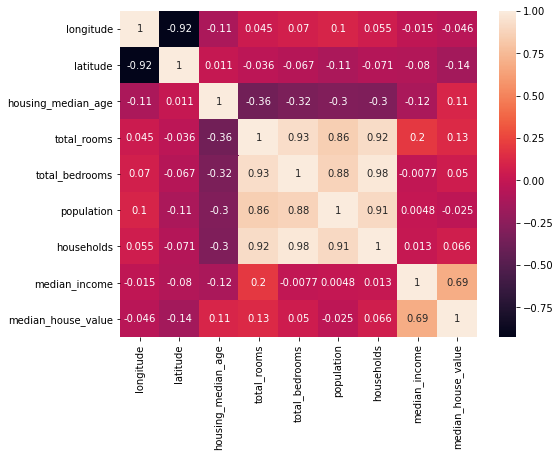

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(demo.corr(),annot=True)

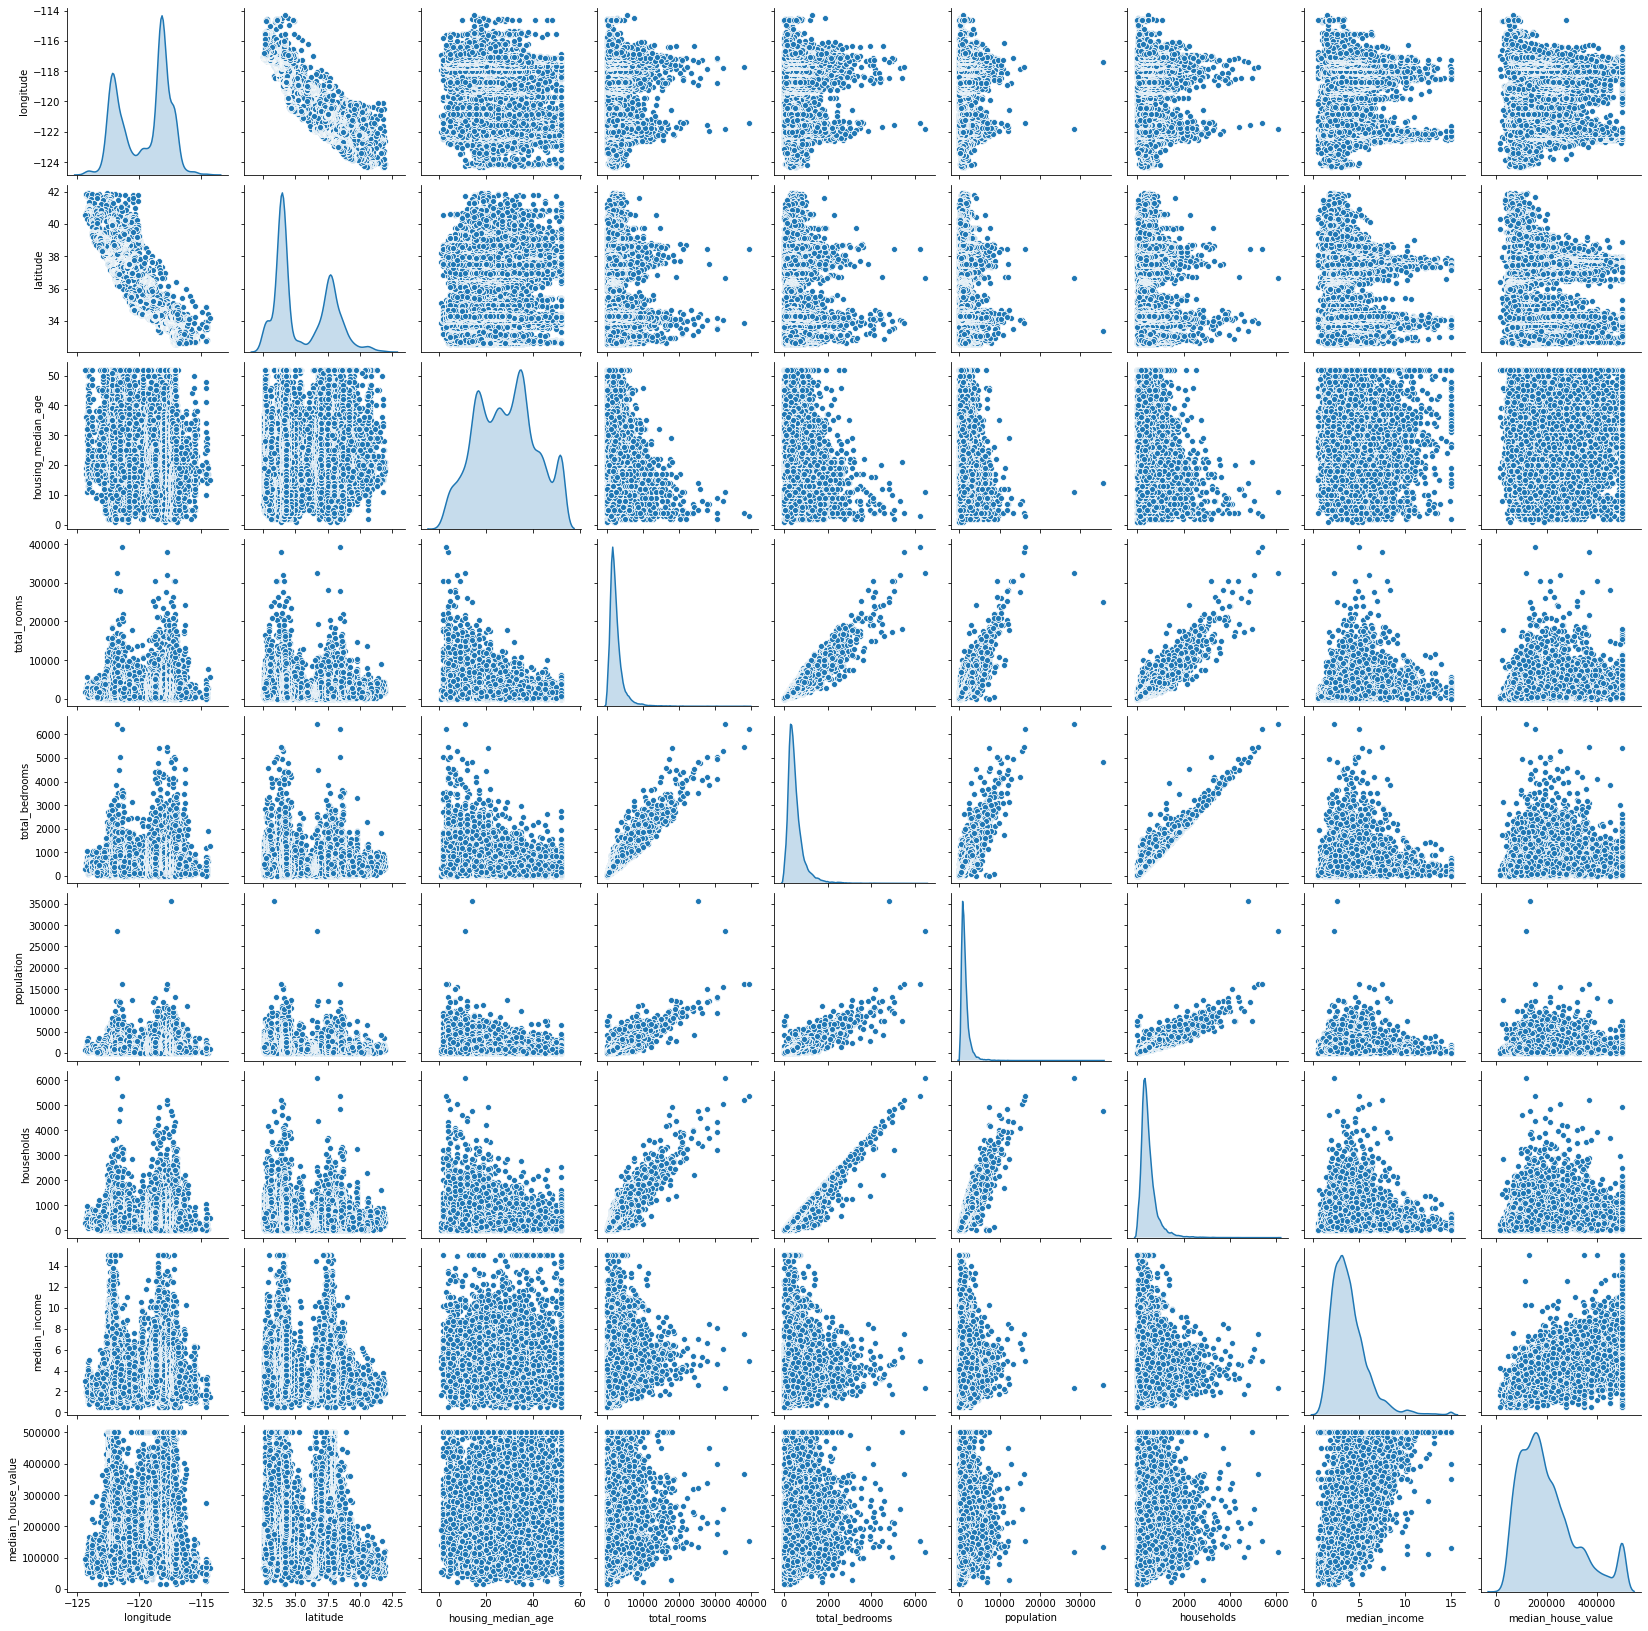

In [22]:
sns.pairplot(demo,diag_kind='kde')

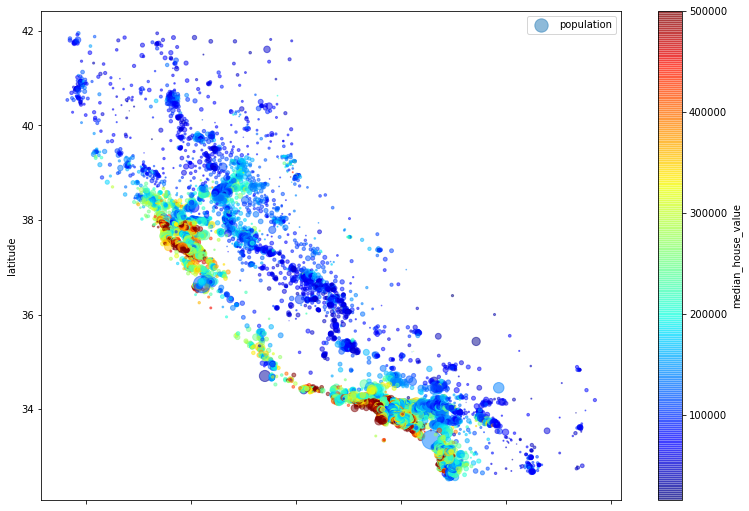

In [24]:
#Visualizing the median house value on heatmap 
demo.plot(kind='scatter', x="longitude", y="latitude", figsize=(13,9), alpha=0.5,
         s=demo["population"]/100, label="population", c="median_house_value",
         cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend(loc="best")
plt.show()

In [67]:
data=demo

In [68]:
#CREATING NEW ATRRIBUTES
data["rooms_per_households"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"] = data["population"]/data["households"]

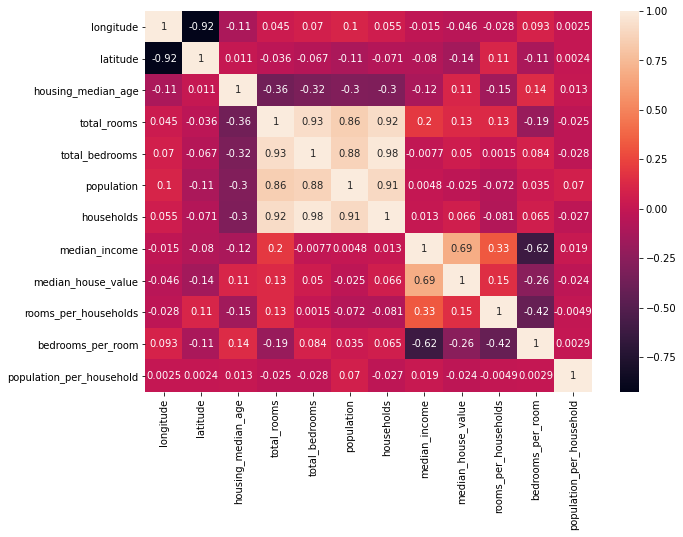

In [69]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

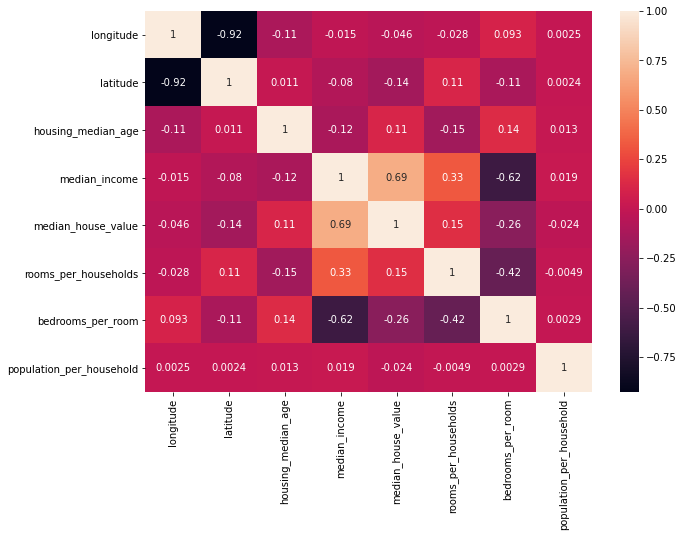

In [70]:
data = data.drop('total_rooms',axis=1)
data = data.drop('total_bedrooms',axis=1)
data = data.drop('population',axis=1)
data = data.drop('households',axis=1)
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   median_income             20640 non-null  float64
 4   median_house_value        20640 non-null  float64
 5   rooms_per_households      20640 non-null  float64
 6   bedrooms_per_room         20433 non-null  float64
 7   population_per_household  20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


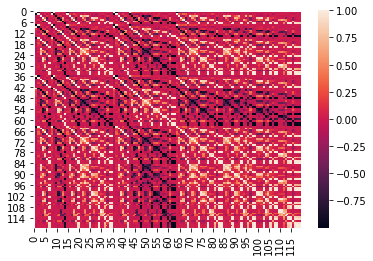

In [128]:
poly = PolynomialFeatures(degree=3)
it = IterativeImputer()
itxtrain = it.fit_transform(X_train)
sns.heatmap(pd.DataFrame(poly.fit_transform(itxtrain)).corr())

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest,SelectFromModel,f_regression
X=data.drop('median_house_value',axis=1)
y=data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=20)
pipe = Pipeline((
("it",IterativeImputer(estimator = LinearRegression())),
("pt", PowerTransformer()),
("poly",PolynomialFeatures(degree=4)),
("skb",SelectKBest(f_regression,k=200)),
("lr", LinearRegression()),
))

In [116]:
import warnings
warnings.filterwarnings('ignore')
#Evaluating models using Cross Validation
from sklearn.model_selection import cross_val_score
scoreslr = cross_val_score(pipe, X_train, y_train, cv=10)
print(scoreslr)

[0.64843444 0.75170256 0.77359221 0.71840208 0.72234568 0.74351678
 0.38693281 0.68812778 0.69361247 0.73535747]


In [117]:
import numpy as np
print("Average Accuracy of my model")
print(np.mean(scoreslr))
print("SD of accuracy of the model")
print(np.std(scoreslr,ddof=1))

Average Accuracy of my model
0.6862024291167668
SD of accuracy of the model
0.11106498952213213


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from xgboost import XGBRegressor
X=data.drop('median_house_value',axis=1)
y=data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=20)
pipe = Pipeline((
("it",IterativeImputer()),
("pt", PowerTransformer()),
("lr", XGBRegressor(n_estimators=100)),
))
#Evaluating models using Cross Validation
from sklearn.model_selection import cross_val_score
scoreslr = cross_val_score(pipe, X_train, y_train, cv=10)
print(scoreslr)
print("Average Accuracy of my model")
print(np.mean(scoreslr))
print("SD of accuracy of the model")
print(np.std(scoreslr,ddof=1))

[-0.03288455 -0.05016369 -0.04286433 -0.03274532 -0.03184917 -0.04032193
 -0.06133872 -0.05530338 -0.04435354 -0.07669014]
Average Accuracy of my model
-0.046851478329170956
SD of accuracy of the model
0.014401123795842975
